## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as st
from sklearn import datasets
from scipy import stats
import os
import numpy as np

In [2]:
# Study data files
mousedata_path = os.path.join("Resources","Mouse_metadata.csv")
studyresults_path = os.path.join("Resources","Study_results.csv")

# Read the mouse data and the study results
mousedata_df = pd.read_csv(mousedata_path)
studyresults_df = pd.read_csv(studyresults_path)

# Combine the data into a single dataset
mergedata_df = pd.merge(mousedata_df, studyresults_df, how="right", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mergedata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
number_mice = len(mergedata_df["Mouse ID"].unique())
number_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mergedata_df.loc[mergedata_df.duplicated(subset = ["Mouse ID", "Timepoint"]),"Mouse ID" ].unique()

duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dulpicate_data =  mergedata_df.loc[mergedata_df["Mouse ID"] == "g989"]


dulpicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

drop_duplicate =  mergedata_df["Mouse ID"].isin(duplicate_mice)
clean_data = mergedata_df[drop_duplicate == False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
final_data = len(clean_data["Mouse ID"].unique())
final_data

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#drugstats = pd.DataFrame(mergedata_df.groupby("Drug Regimen").count())


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


mean_stats = mergedata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_stats = mergedata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
vari_stats = mergedata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sd_stats = mergedata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_stats = mergedata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

drugstats = pd.DataFrame({"Mean":mean_stats, "Median":median_stats, "Variance":vari_stats, "Standard Deviation":sd_stats, "SEM":sem_stats})
    
    
    

drugstats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


summary_data = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": [ "mean", "median", "std","var","sem"]})
summary_data

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

Text(0, 0.5, ' Number of unique mice')

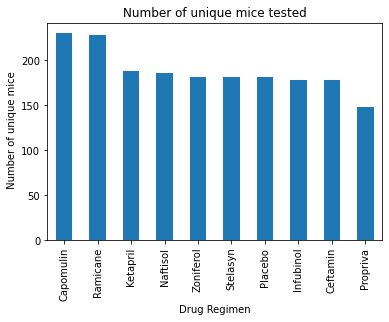

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.


pandadata = clean_data['Drug Regimen'].value_counts()
bardata = pandadata.plot.bar(rot='vertical',title='Number of unique mice tested')

bardata.set_xlabel("Drug Regimen")
bardata.set_ylabel(" Number of unique mice")

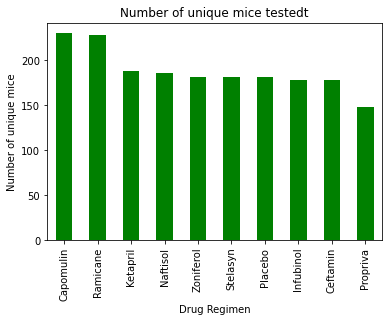

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

pydata = clean_data['Drug Regimen'].value_counts()
pydata_df = pd.DataFrame(pydata)

plt.xdata = pydata_df.plot.bar(legend=False , color= 'g',align = 'center')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of unique mice')
plt.title('Number of unique mice testedt')

plt.show()

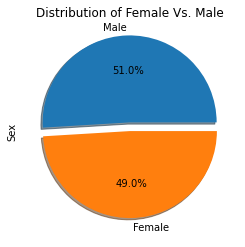

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = clean_data['Sex'].value_counts()
explode = (0.1, 0)
pandasplot = gender.plot.pie(y='Sex',title='Distribution of Female Vs. Male', explode = explode, autopct="%1.1f%%" ,shadow= True) 

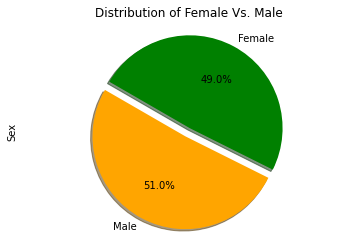

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = clean_data['Sex'].value_counts()
gender_df = pd.DataFrame(gender)

colors = ["orange","green"]
explode = (0.1, 0)

plt.pie(gender,labels=gender.index,colors = colors, shadow =True,explode=explode,autopct="%1.1f%%", startangle = 150);
plt.axis("equal")
plt.title('Distribution of Female Vs. Male')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = clean_data.groupby(["Mouse ID"])["Timepoint"].max()



max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_data = max_timepoint.merge(clean_data, on = ["Mouse ID","Timepoint"], how = "left")

final_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes  &  # add subset 
    

for drug in treatment_list:
    
    final_tumorVol = final_data.loc[final_data["Drug Regimen"]== drug , "Tumor Volume (mm3)"]
    
    tumor_vol_data.append(final_tumorVol)
    
print(final_tumorVol)


3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
75     47.784682
88     61.849023
94     68.923185
106    67.748662
107    57.918381
109    46.784535
110    59.851956
113    64.299830
134    59.741901
150    61.433892
154    64.192341
184    45.000000
188    52.925348
189    45.000000
209    67.527482
223    45.000000
228    64.634949
231    61.386660
238    68.594745
240    64.729837
Name: Tumor Volume (mm3), dtype: float64


In [16]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.


cap_df = final_data.loc[final_data["Drug Regimen"] == "Capomulin"]
ram_df = final_data.loc[final_data["Drug Regimen"] == "Ramicane"]
inf_df = final_data.loc[final_data["Drug Regimen"] == "Infubinol"]
ceft_df = final_data.loc[final_data["Drug Regimen"] == "Ceftamin"]


In [17]:
  # Determine outliers using upper and lower bounds

In [18]:
  
#Capomulin outliers

ctumors = cap_df["Tumor Volume (mm3)"]

cquartiles = ctumors.quantile([0.25,0.5,0.75])
clowerq = cquartiles[0.25]
cupperq = cquartiles[0.75]
ciqr = cupperq-clowerq

clower_bound = clowerq - (1.5*ciqr)
cupper_bound = cupperq + (1.5*ciqr)

print(f"Capomulin lowerbound is {clower_bound} and upper bound is {cupper_bound}.")


Capomulin lowerbound is 20.70456164999999 and upper bound is 51.83201549.


In [19]:

#Ramicane Outliers

rtumors = ram_df["Tumor Volume (mm3)"]

rquartiles = rtumors.quantile([0.25,0.5,0.75])
rlowerq = rquartiles[0.25]
rupperq = rquartiles[0.75]
riqr = rupperq-rlowerq

rlower_bound = rlowerq - (1.5*riqr)
rupper_bound = rupperq + (1.5*riqr)
print(f"Ramicane lowerbound is {rlower_bound} and upper bound is {rupper_bound}.")


Ramicane lowerbound is 17.912664470000003 and upper bound is 54.30681135.


In [20]:

#Infubinol Outliers

itumors = inf_df["Tumor Volume (mm3)"]

iquartiles = itumors.quantile([0.25,0.5,0.75])
ilowerq = iquartiles[0.25]
iupperq = iquartiles[0.75]
iiqr = iupperq-ilowerq

ilower_bound = ilowerq - (1.5*iiqr)
iupper_bound = iupperq + (1.5*iiqr)
print(f"Infubinol lowerbound is {ilower_bound} and upper bound is {iupper_bound}.")


Infubinol lowerbound is 36.83290494999999 and upper bound is 82.74144559000001.


In [21]:

#Ceftamin Outliers

cetumors = ceft_df["Tumor Volume (mm3)"]

cequartiles = cetumors.quantile([0.25,0.5,0.75])
celowerq = cequartiles[0.25]
ceupperq = cequartiles[0.75]
ceiqr = ceupperq-celowerq

celower_bound = celowerq - (1.5*ceiqr)
ceupper_bound = ceupperq + (1.5*ceiqr)
print(f"Ceftamin lowerbound is {celower_bound} and upper bound is {ceupper_bound}.")

Ceftamin lowerbound is 25.355449580000002 and upper bound is 87.66645829999999.


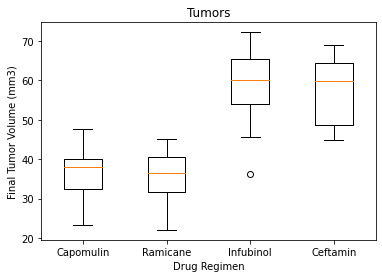

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data_plot = [ctumors, rtumors, itumors, cetumors]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

In [23]:
line_df = final_data[final_data["Drug Regimen"].isin(["Capomulin"])]
line_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
80,i557,45,Capomulin,Female,1,24,47.685963,1
83,i738,45,Capomulin,Female,23,20,37.311846,2
85,j119,45,Capomulin,Female,7,23,38.125164,1
87,j246,35,Capomulin,Female,21,21,38.753265,1
108,l509,45,Capomulin,Male,17,21,41.483008,3


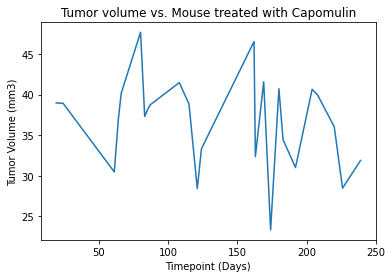

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

x_axis = line_df["Timepoint"]
y_axis = line_df["Tumor Volume (mm3)"]

plt.plot(y_axis)

plt.title('Tumor volume vs. Mouse treated with Capomulin')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()



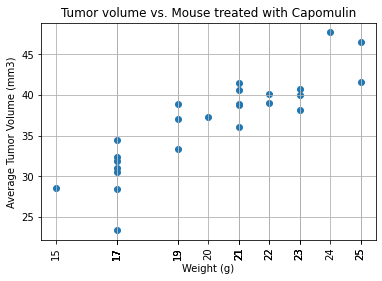

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight = line_df.iloc[:,5]
tumor_volume = line_df.iloc[:,6]

plt.scatter(mouse_weight,tumor_volume)
plt.xticks(mouse_weight, rotation =90)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Tumor volume vs. Mouse treated with Capomulin')
plt.grid()
plt.show()

## Correlation and Regression

In [26]:
# performing  a linear regression
vc_slope, vc_int, vc_r, vc_p,vc_std_err =  stats.linregress(mouse_weight,tumor_volume)

In [27]:
# creating Equation line 
regress_values =  vc_slope * mouse_weight + vc_int

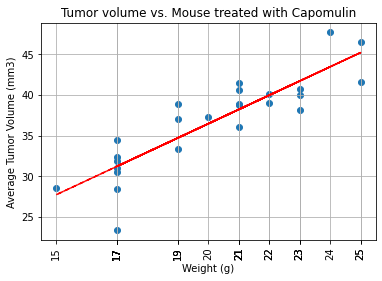

In [28]:
mouse_weight = line_df.iloc[:,5]
tumor_volume = line_df.iloc[:,6]

plt.scatter(mouse_weight,tumor_volume)
plt.plot(mouse_weight,regress_values,'--',color="r")
plt.xticks(mouse_weight, rotation =90)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Tumor volume vs. Mouse treated with Capomulin')
plt.grid()
plt.show()